<a href="https://colab.research.google.com/github/Poushali11/Classification-prediction/blob/main/Analytics_Vidhya_ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analytics Vidhya Job-A-THON


Importing and installing the libraries

In [ ]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 2.4 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt      #for visualization
import numpy as np                   #for numeric functions
import seaborn as sns                #for visualization
import sweetviz as sv                #for EDA and visualization

Loading the train data

In [ ]:
train_c = pd.read_csv("/content/train_PDjVQMB.csv")
train_c.head(7)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
5,e7a8332a,31,Female,Less than 5L,111026.79,4,1,1,0,Good,0
6,f2de1836,56,Male,Less than 5L,1072102.23,2,1,2,1,Average,0


In [ ]:
#seeing the data shape
train_c.shape

(6650, 11)

In [ ]:
#Importing the test data
test_c= pd.read_csv("/content/test_lTY72QC.csv")
test_c.shape

(2851, 10)

In [ ]:
test_c.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [ ]:
#looking for missing values, if any 
train_c.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [ ]:
test_c.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

Great, no missing values. Lets move.

In [ ]:
# Lets check if the data is imbalanced
train_c['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

Data seems imbalanced, lets visualize with a pie chart

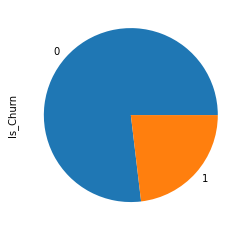

In [ ]:
train_c['Is_Churn'].value_counts(normalize=True).plot.pie()

Ok, so clearly data is imbalanced. We must keep it in mind while model building. Now, lets check for duplicates.

In [ ]:
train_c.duplicated(subset=None,keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
6645    False
6646    False
6647    False
6648    False
6649    False
Length: 6650, dtype: bool

In [ ]:
print(train_c.duplicated().sum())

0


Hence, we see there are no duplicate rows in the data.So,lets move to further EDA 

In [ ]:
#let's check multicollinearity

train_c.corr().style.background_gradient(cmap='coolwarm')

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
Age,1.000000,0.002154,0.017353,0.032166,0.012089,0.204301
Balance,0.002154,1.000000,-0.019385,-0.005088,-0.025259,0.056380
Vintage,0.017353,-0.019385,1.000000,-0.027286,0.001856,0.020152
Transaction_Status,0.032166,-0.005088,-0.027286,1.000000,0.006526,-0.086917
Credit_Card,0.012089,-0.025259,0.001856,0.006526,1.000000,-0.000848
Is_Churn,0.204301,0.056380,0.020152,-0.086917,-0.000848,1.000000


Multicollinearity among the variables is very low, hence no problem.

Now I am using a auto EDA library called sweetviz to generate a full EDA report with respect to our target variable so that we can derive insights from it.

In [ ]:
sweet_report = sv.analyze([train_c,"full_data"],target_feat="Is_Churn")

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
sweet_report.show_html('sweet_report.html')

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Now, what are some of the important insights we can gather from the sweet_report?

a) People whose income are above 10L and above 15L have a higher churn rate.So,high earning customers are churning out more.

b) People who are associated with the bank for 4 years have the highest churn rate.

c)Only 4% of people are holding 3+ products and people holding 1 product are highest in number as well as has the highest churning rate.

d)Customers who are in the poor credit category have the highest churn rate.

So, all the insights are pointing towards a little bit lack of trust and confidence in the public about the bank which is leading to churning.

In [ ]:
train_c.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [ ]:
train_c.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


#Feature Engineering

we don't need customer Id in the model building or to derive any insights, so we are droping it off

In [ ]:
train_c.drop(columns='ID',axis=1,inplace=True)
test_c.drop(columns='ID',axis=1,inplace=True)

In [ ]:
train_c.columns

Index(['Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category', 'Is_Churn'],
      dtype='object')

Lets further divide the train data into independent and dependent variables data i.e train_x and train_y.

In [ ]:
train_x= train_c.iloc[:,0:9]
train_y= train_c.iloc[:,9]

In [ ]:
train_x.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor
4,39,Female,More than 15L,893146.23,1,1,1,1,Good


In [ ]:
train_y.head()

0    1
1    0
2    0
3    1
4    1
Name: Is_Churn, dtype: int64

Now lets convert categorical features into numerical format

In [ ]:
#importing the library
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
lb= LabelEncoder()
train_x['Credit_Category']=lb.fit_transform(train_x['Credit_Category'])
test_c['Credit_Category']=lb.fit_transform(test_c['Credit_Category'])

In [ ]:
train_x['Income'] =lb.fit_transform(train_x['Income'])
test_c['Income'] =lb.fit_transform(test_c['Income'])

In [ ]:
dummy=pd.get_dummies(train_x['Gender'])
dummy.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
dummy1=pd.get_dummies(test_c['Gender'])
dummy1.head()

,Female,Male
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [ ]:
train_x =pd.concat([train_x,dummy],axis=1)
train_x

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Female,Male
0,36,Female,1,563266.44,4,0,1,0,0,1,0
1,53,Female,2,875572.11,2,1,1,1,2,1,0
2,35,Female,3,701607.06,2,1,2,0,2,1,0
3,43,Female,3,1393922.16,0,1,2,1,2,1,0
4,39,Female,3,893146.23,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6645,61,Male,1,1354526.19,4,1,2,1,2,0,1
6646,42,Female,1,596286.54,3,1,2,1,0,1,0
6647,29,Male,2,979298.19,2,0,2,0,2,0,1
6648,66,Female,0,395233.65,3,0,2,1,2,1,0


In [ ]:
test_c =pd.concat([test_c,dummy1],axis=1)
test_c

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Female,Male
0,50,Female,3,1008636.39,2,1,2,1,0,1,0
1,36,Male,1,341460.72,2,0,2,1,0,0,1
2,25,Female,0,439460.10,0,0,2,1,1,1,0
3,41,Male,2,28581.93,0,1,2,1,2,0,1
4,48,Male,3,1104540.03,2,1,3+,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2846,40,Female,0,1338458.22,0,0,1,1,2,1,0
2847,48,Female,3,1448280.27,0,1,2,1,0,1,0
2848,59,Male,3,1100555.64,3,0,1,1,2,0,1
2849,34,Female,1,1502818.92,2,0,1,1,2,1,0


In [ ]:
train_x = train_x.drop(["Gender"],axis=1)

In [ ]:
test_c = test_c.drop(["Gender"],axis=1)

In [ ]:
train_x.head()

,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Female,Male
0,36,1,563266.44,4,0,1,0,0,1,0
1,53,2,875572.11,2,1,1,1,2,1,0
2,35,3,701607.06,2,1,2,0,2,1,0
3,43,3,1393922.16,0,1,2,1,2,1,0
4,39,3,893146.23,1,1,1,1,1,1,0


In [ ]:
test_c.head()

,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Female,Male
0,50,3,1008636.39,2,1,2,1,0,1,0
1,36,1,341460.72,2,0,2,1,0,0,1
2,25,0,439460.10,0,0,2,1,1,1,0
3,41,2,28581.93,0,1,2,1,2,0,1
4,48,3,1104540.03,2,1,3+,0,1,0,1


Lets check for outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


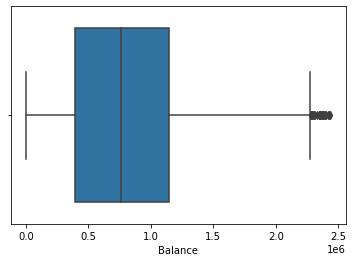

In [ ]:
sns.boxplot(train_x['Balance'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


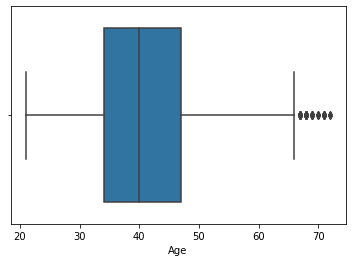

In [ ]:
sns.boxplot(train_x['Age'])

So, lets apply winsorization in these columns as part of outlier treatment.

In [ ]:
pip install feature_engine

     |████████████████████████████████| 205 kB 2.6 MB/s 
     |████████████████████████████████| 9.8 MB 32.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


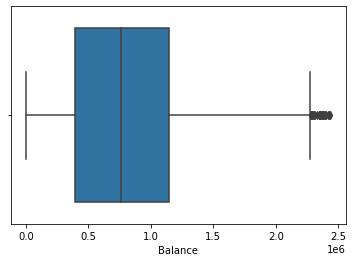

In [ ]:
from feature_engine.outliers import Winsorizer
Winsor = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['Balance'])
Winsor.fit_transform(train_x[['Balance']])
sns.boxplot(train_x.Balance)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


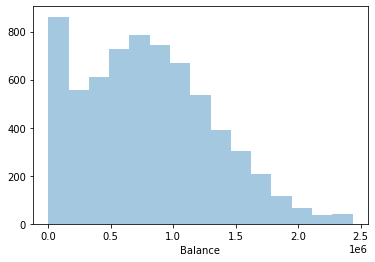

In [ ]:
sns.distplot(train_x['Balance'],bins =15,kde=False)

The Balance data is little bit left skewed and winsorization may not have really worked out in capping outliers as seen in the boxplot.However, since these outliers are non error outliers and important to data demographics, we will not remove the outliers or apply any other transformation. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


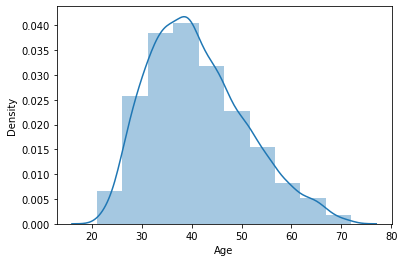

In [ ]:
sns.distplot(train_x['Age'],bins=10)

Since the age data is more or less normally distributed and not that much affected by outliers.Also outliers are Non error outliers so we are keeping as it is.

Now, lets normalize the data. However, before doing that, lets remove the + sign from the ProductHoldings columns,so that while normalizing no problem arises.

In [ ]:
#removing '+',- sign with a space
train_x.Product_Holdings = train_x.Product_Holdings.str.replace('[+, -]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
train_x.head()

,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Female,Male
0,36,1,563266.44,4,0,1,0,0,1,0
1,53,2,875572.11,2,1,1,1,2,1,0
2,35,3,701607.06,2,1,2,0,2,1,0
3,43,3,1393922.16,0,1,2,1,2,1,0
4,39,3,893146.23,1,1,1,1,1,1,0


In [ ]:
#Normalization 
from sklearn.preprocessing import MinMaxScaler
norm= MinMaxScaler().fit(train_x)
train_xn = norm.transform(train_x)

In [ ]:
#removing '+',- sign with a space
test_c.Product_Holdings = test_c.Product_Holdings.str.replace('[+, -]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
#normalization of test data
norm1= MinMaxScaler().fit(test_c)
test_cnorm = norm1.transform(test_c)

Now, that all preprocessing is done, lets move on to model building.

#Ensemble Model Building

In [ ]:
ytest= pd.read_csv("/content/sample_OoSmYo5 (1).csv")
ytest.head()

,ID,Is_Churn
0,55480787,1
1,9aededf2,1
2,a5034a09,1
3,b3256702,1
4,dc28adb5,1


In [ ]:
ytest= ytest.drop(["ID"],axis=1)
ytest

,Is_Churn
0,1
1,1
2,1
3,1
4,1
...,...
2846,1
2847,1
2848,1
2849,1


In [ ]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import accuracy_score


#Random Forest Classifier

In [ ]:
#Default Random Forest model without any tuning - base metric
RF_model_default = RandomForestClassifier()
RF_model_default.fit(train_x, train_y)
y_pred_RF_default =RF_model_default.predict(test_c)

In [ ]:
acc= accuracy_score(ytest,y_pred_RF_default)
print(acc)

0.05085934759733427


In [ ]:
#Parameter tuning with GridSearchCV 

#######################
### Random Forest
#######################


estimator_RF = RandomForestClassifier()
parameters_RF = {
    'n_estimators': (50,150,1),                #The number of trees in the forest
    'criterion': ('gini', 'entropy'),            #The function to measure the quality of a split
    'max_depth': (10,160,1),                     #The maximum depth of the tree
    'min_samples_split': (0.000001, 0.00001, 0.0001),   #The minimum number of samples required to split an internal node
                }
# with GridSearch
grid_search_RF = GridSearchCV(
    estimator=estimator_RF,
    param_grid=parameters_RF,
    scoring = 'f1',
    n_jobs = -1,
    cv = 5)

In [ ]:
train_y

0       1
1       0
2       0
3       1
4       1
       ..
6645    1
6646    0
6647    0
6648    1
6649    0
Name: Is_Churn, Length: 6650, dtype: int64

In [ ]:
RF_1=grid_search_RF.fit(train_x, train_y)
y_pred_RF1 =RF_1.predict(test_c)
print(grid_search_RF.best_params_ ) 
print(grid_search_RF.best_score_ ) 

{'criterion': 'entropy', 'max_depth': 160, 'min_samples_split': 1e-06, 'n_estimators': 1}
0.2825120107047088


In [ ]:
y_pred_RF1

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
metrics.f1_score(ytest,y_pred_RF1,average='weighted',labels=np.unique(y_pred_RF1))

0.3805737006532235

#Bagging Model

In [ ]:
#Default Bagging model without any tuning - base metric
Bag_model_default = BaggingClassifier()
Bag_model_default.fit(train_xn, train_y)
y_pred_Bag_default =Bag_model_default.predict(test_cnorm)


In [ ]:
acc1= accuracy_score(ytest,y_pred_Bag_default)
print(acc1)

0.08663626797614872


In [ ]:
#Parameter tuning with GridSearchCV 
#################################
### Bagging
#################################
estimator_Bag = BaggingClassifier()
parameters_Bag = {
    'n_estimators': (200,500,1),                                               
    'max_features': (0.1,0.7, 0.01) 
                }
# with GridSearch
grid_search_Bag= GridSearchCV(
    estimator=estimator_Bag,
    param_grid=parameters_Bag,
    scoring = 'f1',
    n_jobs = -1,
    cv = 5)

Bag_1=grid_search_Bag.fit(train_xn, train_y)
y_pred_Bag1 =Bag_1.predict(test_cnorm)

In [ ]:
metrics.f1_score(ytest,y_pred_Bag1,average='weighted',labels=np.unique(y_pred_Bag1))

0.3947072072072072

#Ada Boost Model

In [ ]:
#Default AdaBoost model without any tuning - base metric
ADB_model_default = AdaBoostClassifier()
ADB_model_default.fit(train_xn, train_y)
y_pred_ADB_default =ADB_model_default.predict(test_cnorm)

In [ ]:
acc2=accuracy_score(ytest,y_pred_ADB_default)
print(acc2)

0.015433181339880744


In [ ]:
estimator_ADB = AdaBoostClassifier()
parameters_ADB = {
    'n_estimators': (300,450,5), 
    'algorithm':('SAMME', "SAMME.R"),
                }
# with GridSearch
grid_search_ADB= GridSearchCV(
    estimator=estimator_ADB,
    param_grid=parameters_ADB,
    scoring = 'f1',
    n_jobs = -1,
    cv = 5
)

In [ ]:
ADB_1=grid_search_ADB.fit(train_xn, train_y)
y_pred_ADB1 =ADB_1.predict(test_cnorm)

In [ ]:
y_pred_ADB1

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
metrics.f1_score(ytest,y_pred_ADB1,average='weighted',labels=np.unique(y_pred_ADB1))

0.04189560439560439

#XGBoost Model

In [ ]:
#Default XGBoost model without any tuning - base metric
XGB_model_default = XGBClassifier()
XGB_model_default.fit(train_xn, train_y)
y_pred_XGB_default =XGB_model_default.predict(test_cnorm)

In [ ]:
acc3=accuracy_score(ytest,y_pred_XGB_default)
print(acc3)


0.018940722553490004


In [ ]:
#Parameter tuning with GridSearchCV 
#################################
### XGBoost 
#################################
estimator_XGB = XGBClassifier(objective ='binary:logistic')
parameters_XGB = {
    'learning_rate':(0.01, 0.1),
    'n_estimators': (350,450,1), 
    'colsample_bytree' :(0.2, 0.3),
                }
# with GridSearch
grid_search_XGB= GridSearchCV(
    estimator=estimator_XGB,
    param_grid=parameters_XGB,
    scoring = 'f1',
    n_jobs = -1,
    cv = 5
)

In [ ]:
XGB_1=grid_search_XGB.fit(train_xn, train_y)
y_pred_XGB1 =XGB_1.predict(test_cnorm)
y_pred_XGB1

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
metrics.f1_score(ytest,y_pred_XGB1,average='weighted',labels=np.unique(y_pred_XGB1))

0.06054421768707483

Since the dataset is an imbalanced one, taking accuracy as the parameter is not suitable.Hence based on the f1 score,bagging is giving the highest f1 score

In [ ]:
ytest= pd.read_csv("/content/sample_OoSmYo5 (1).csv")
ytest = ytest.drop(["Is_Churn"],axis=1)
ytest

,ID
0,55480787
1,9aededf2
2,a5034a09
3,b3256702
4,dc28adb5
...,...
2846,19e40adf
2847,52d5bc8d
2848,f708121b
2849,f008715d


In [ ]:
bagging_pred = pd.DataFrame(y_pred_Bag1,columns=['Is_Churn'])

submission_pred =pd.concat([ytest,bagging_pred],axis=1)

submission_pred.to_csv('Submission_bagging_preds.csv',index=False)

In [ ]:
submission_pred.head()

,ID,Is_Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,0
3,b3256702,1
4,dc28adb5,0
